E(W):  105.35463079230567  : Aw :  21.5  : Bw :  5.272617898447153  : Sw2 :  0.2674370681990371  : Ay :  9.0  : By :  106.35463079230567  : Sy2 :  17.293047830956926
E(W):  22.169465559490394  : Aw :  34.0  : Bw :  9.494997051208028  : Sw2 :  0.2899854720915334  : Ay :  17.0  : By :  128.52409635179606  : Sy2 :  6.697031614776754
E(W):  21.3587015950745  : Aw :  46.5  : Bw :  13.708936378936958  : Sw2 :  0.2394382750795703  : Ay :  25.0  : By :  149.88279794687057  : Sy2 :  5.931205240804131
E(W):  20.795247169575518  : Aw :  59.0  : Bw :  17.924772237012927  : Sw2 :  0.3145353761936473  : Ay :  33.0  : By :  170.67804511644607  : Sy2 :  5.98303839914064
E(W):  20.233848619687407  : Aw :  71.5  : Bw :  22.146584546579614  : Sw2 :  0.37689899461635473  : Ay :  41.0  : By :  190.9118937361335  : Sy2 :  6.52471657125251
E(W):  19.87487238649863  : Aw :  84.0  : Bw :  26.374733227696737  : Sw2 :  0.2992982190958356  : Ay :  49.0  : By :  210.78676612263212  : Sy2 :  4.564810348249205
E(W):

E(W):  13.374750046928561  : Aw :  909.0  : Bw :  339.27861269912916  : Sw2 :  0.38784555644827534  : Ay :  577.0  : By :  1233.181861716594  : Sy2 :  2.017925286548227
E(W):  13.335541452684366  : Aw :  921.5  : Bw :  344.6085383665338  : Sw2 :  0.3811128271442375  : Ay :  585.0  : By :  1246.5174031692784  : Sy2 :  2.039203094890372
E(W):  13.299319407971312  : Aw :  934.0  : Bw :  349.9559932635417  : Sw2 :  0.40965361815587287  : Ay :  593.0  : By :  1259.8167225772497  : Sy2 :  2.1162259698929837
E(W):  13.262907511615984  : Aw :  946.5  : Bw :  355.31972302711284  : Sw2 :  0.3799072309415177  : Ay :  601.0  : By :  1273.0796300888658  : Sy2 :  2.1732459069967125
E(W):  13.229444191069302  : Aw :  959.0  : Bw :  360.70097326299845  : Sw2 :  0.38212952908008785  : Ay :  609.0  : By :  1286.309074279935  : Sy2 :  2.0743730574042782
E(W):  13.193771655849545  : Aw :  971.5  : Bw :  366.09960530553604  : Sw2 :  0.3699863723783506  : Ay :  617.0  : By :  1299.5028459357845  : Sy2 :  1.

E(W):  11.826192572205956  : Aw :  1609.0  : Bw :  662.9749943348662  : Sw2 :  0.41239790613997573  : Ay :  1025.0  : By :  1933.4833072111578  : Sy2 :  1.8952854112565491
E(W):  11.805631810168096  : Aw :  1621.5  : Bw :  669.176558856433  : Sw2 :  0.4224933553295637  : Ay :  1033.0  : By :  1945.2889390213259  : Sy2 :  1.95843114088251
E(W):  11.78561603217927  : Aw :  1634.0  : Bw :  675.3909228616902  : Sw2 :  0.4223660026634409  : Ay :  1041.0  : By :  1957.074555053505  : Sy2 :  1.8419529804926902
E(W):  11.76622220671609  : Aw :  1646.5  : Bw :  681.6180310933426  : Sw2 :  0.4142924196431724  : Ay :  1049.0  : By :  1968.840777260221  : Sy2 :  1.7957597738092115
E(W):  11.746961329899685  : Aw :  1659.0  : Bw :  687.8580719163604  : Sw2 :  0.4335661292824457  : Ay :  1057.0  : By :  1980.5877385901208  : Sy2 :  1.9153412743213967
E(W):  11.727465154449538  : Aw :  1671.5  : Bw :  694.110411024763  : Sw2 :  0.4069908099063196  : Ay :  1065.0  : By :  1992.3152037445705  : Sy2 :  

E(W):  10.856861425892848  : Aw :  2371.5  : Bw :  1062.3836623856157  : Sw2 :  0.4484321238222706  : Ay :  1513.0  : By :  2622.5187661355367  : Sy2 :  1.656639439250514
E(W):  10.844125169971706  : Aw :  2384.0  : Bw :  1069.2474647056622  : Sw2 :  0.45955830999276787  : Ay :  1521.0  : By :  2633.3628913055086  : Sy2 :  1.759631241449485
E(W):  10.831776989380856  : Aw :  2396.5  : Bw :  1076.1199262128366  : Sw2 :  0.463046204621863  : Ay :  1529.0  : By :  2644.1946682948897  : Sy2 :  1.7278209571527987
E(W):  10.81980036143965  : Aw :  2409.0  : Bw :  1083.0009375261902  : Sw2 :  0.44922847692889256  : Ay :  1537.0  : By :  2655.0144686563294  : Sy2 :  1.7698652611669998
E(W):  10.807983793819428  : Aw :  2421.5  : Bw :  1089.8907168610465  : Sw2 :  0.4589393616606441  : Ay :  1545.0  : By :  2665.822452450149  : Sy2 :  1.7098326115223734
E(W):  10.795874748442651  : Aw :  2434.0  : Bw :  1096.7890332656539  : Sw2 :  0.4361265981196714  : Ay :  1553.0  : By :  2676.6183271985915 

E(W):  10.245212704688452  : Aw :  3121.5  : Bw :  1488.1050185999552  : Sw2 :  0.4844002675595085  : Ay :  1993.0  : By :  3254.019037655525  : Sy2 :  1.6832713105029267
E(W):  10.236781620988731  : Aw :  3134.0  : Bw :  1495.4111801055592  : Sw2 :  0.48085674937435263  : Ay :  2001.0  : By :  3264.255819276514  : Sy2 :  1.6065212251459635
E(W):  10.22874873995994  : Aw :  3146.5  : Bw :  1502.7233022477374  : Sw2 :  0.4945648804048555  : Ay :  2009.0  : By :  3274.484568016474  : Sy2 :  1.606464473456204
E(W):  10.220702453478232  : Aw :  3159.0  : Bw :  1510.0411870883313  : Sw2 :  0.47773235698847355  : Ay :  2017.0  : By :  3284.705270469952  : Sy2 :  1.675058041374706
E(W):  10.212923845796382  : Aw :  3171.5  : Bw :  1517.3650051183934  : Sw2 :  0.47950365031240844  : Ay :  2025.0  : By :  3294.9181943157487  : Sy2 :  1.623734553435
E(W):  10.204915789242241  : Aw :  3184.0  : Bw :  1524.6947007804752  : Sw2 :  0.48237018436513857  : Ay :  2033.0  : By :  3305.1231101049907  : S

E(W):  9.78144169410902  : Aw :  3996.5  : Bw :  2012.0912847392274  : Sw2 :  0.5128559308937695  : Ay :  2553.0  : By :  3953.5017393205085  : Sy2 :  1.6279425268561478
E(W):  9.776191587877884  : Aw :  4009.0  : Bw :  2019.7343136309898  : Sw2 :  0.5269427358661255  : Ay :  2561.0  : By :  3963.277930908386  : Sy2 :  1.5179494639919777
E(W):  9.771036755165486  : Aw :  4021.5  : Bw :  2027.3809340566904  : Sw2 :  0.5126998441991719  : Ay :  2569.0  : By :  3973.0489676635516  : Sy2 :  1.5648112371661476
E(W):  9.76604455006542  : Aw :  4034.0  : Bw :  2035.0312241519653  : Sw2 :  0.5144209604951613  : Ay :  2577.0  : By :  3982.815012213617  : Sy2 :  1.538916364442534
E(W):  9.7609381568566  : Aw :  4046.5  : Bw :  2042.6851494780585  : Sw2 :  0.505765984799385  : Ay :  2585.0  : By :  3992.575950370474  : Sy2 :  1.5089144058728041
E(W):  9.755873787948977  : Aw :  4059.0  : Bw :  2050.342749937929  : Sw2 :  0.5070232341582331  : Ay :  2593.0  : By :  4002.331824158423  : Sy2 :  1.48

E(W):  9.523770504063576  : Aw :  4696.5  : Bw :  2445.227720399242  : Sw2 :  0.5058309899206558  : Ay :  3001.0  : By :  4493.608608681608  : Sy2 :  1.494681538135733
E(W):  9.519769601670246  : Aw :  4709.0  : Bw :  2453.0458744066045  : Sw2 :  0.526560757751764  : Ay :  3009.0  : By :  4503.128378283278  : Sy2 :  1.5045882888601065
E(W):  9.515585783042857  : Aw :  4721.5  : Bw :  2460.8665535925084  : Sw2 :  0.5186064774421282  : Ay :  3017.0  : By :  4512.643964066321  : Sy2 :  1.5254014514076155
E(W):  9.511576504500345  : Aw :  4734.0  : Bw :  2468.689780547416  : Sw2 :  0.5110969351322547  : Ay :  3025.0  : By :  4522.155540570821  : Sy2 :  1.5076402089156358
E(W):  9.507514706291385  : Aw :  4746.5  : Bw :  2476.515576163276  : Sw2 :  0.5295991675714851  : Ay :  3033.0  : By :  4531.663055277113  : Sy2 :  1.5838191358575737
E(W):  9.503402121108351  : Aw :  4759.0  : Bw :  2484.3438344456836  : Sw2 :  0.5268617702063974  : Ay :  3041.0  : By :  4541.166457398222  : Sy2 :  1.54

E(W):  9.274245167226296  : Aw :  5484.0  : Bw :  2942.113030998704  : Sw2 :  0.5386284401215341  : Ay :  3505.0  : By :  5085.647268749779  : Sy2 :  1.420386288712337
E(W):  9.270031582981533  : Aw :  5496.5  : Bw :  2950.0617475893746  : Sw2 :  0.5367135856345463  : Ay :  3513.0  : By :  5094.9173003327605  : Sy2 :  1.4570958315788298
E(W):  9.265826560845108  : Aw :  5509.0  : Bw :  2958.012127113571  : Sw2 :  0.5357080914809839  : Ay :  3521.0  : By :  5104.183126893606  : Sy2 :  1.380969092746771
E(W):  9.261584330334488  : Aw :  5521.5  : Bw :  2965.964162515136  : Sw2 :  0.5269627191898557  : Ay :  3529.0  : By :  5113.44471122394  : Sy2 :  1.4208561984493935
E(W):  9.25731115941424  : Aw :  5534.0  : Bw :  2973.9178710645865  : Sw2 :  0.5395570025747577  : Ay :  3537.0  : By :  5122.702022383354  : Sy2 :  1.449091896768738
E(W):  9.252942776161637  : Aw :  5546.5  : Bw :  2981.8732034440372  : Sw2 :  0.538986372979765  : Ay :  3545.0  : By :  5131.954965159516  : Sy2 :  1.44579

E(W):  9.029390243496959  : Aw :  6109.0  : Bw :  3341.395355198554  : Sw2 :  0.5418014879019789  : Ay :  3905.0  : By :  5543.443763303594  : Sy2 :  1.4523217898469722
E(W):  9.023640460433802  : Aw :  6121.5  : Bw :  3349.4158279115823  : Sw2 :  0.5351254548581464  : Ay :  3913.0  : By :  5552.467403764028  : Sy2 :  1.41755521938323
E(W):  9.017877159100701  : Aw :  6134.0  : Bw :  3357.4375634081675  : Sw2 :  0.552223935926615  : Ay :  3921.0  : By :  5561.485280923129  : Sy2 :  1.4502439404539151
E(W):  9.012018751341214  : Aw :  6146.5  : Bw :  3365.4605165389917  : Sw2 :  0.539485334639933  : Ay :  3929.0  : By :  5570.49729967447  : Sy2 :  1.415690576888596
E(W):  9.006321401096738  : Aw :  6159.0  : Bw :  3373.4847106752036  : Sw2 :  0.5441105473912422  : Ay :  3937.0  : By :  5579.503621075567  : Sy2 :  1.4125210961215366
E(W):  9.000470328410023  : Aw :  6171.5  : Bw :  3381.5101295736363  : Sw2 :  0.550495336892588  : Ay :  3945.0  : By :  5588.504091403977  : Sy2 :  1.42532

E(W):  8.733006323702012  : Aw :  6821.5  : Bw :  3800.4106075734085  : Sw2 :  0.5550657411522992  : Ay :  4361.0  : By :  6048.972976321181  : Sy2 :  1.3703548952103595
E(W):  8.729129270439843  : Aw :  6834.0  : Bw :  3808.4963036914382  : Sw2 :  0.555097494078242  : Ay :  4369.0  : By :  6057.70210559162  : Sy2 :  1.359323694847188
E(W):  8.725227613647695  : Aw :  6846.5  : Bw :  3816.583179097009  : Sw2 :  0.5714640367106378  : Ay :  4377.0  : By :  6066.427333205268  : Sy2 :  1.416032022364841
E(W):  8.721367341625129  : Aw :  6859.0  : Bw :  3824.671204752444  : Sw2 :  0.5483724740924143  : Ay :  4385.0  : By :  6075.148700546893  : Sy2 :  1.3879402502010076
E(W):  8.71765616183099  : Aw :  6871.5  : Bw :  3832.760434301549  : Sw2 :  0.5424334837965894  : Ay :  4393.0  : By :  6083.866356708724  : Sy2 :  1.3963179022126928
E(W):  8.713826853226523  : Aw :  6884.0  : Bw :  3840.8508862140075  : Sw2 :  0.5546654197371562  : Ay :  4401.0  : By :  6092.58018356195  : Sy2 :  1.383227

E(W):  8.549024461280512  : Aw :  7546.5  : Bw :  4271.4299388621175  : Sw2 :  0.5630471277814312  : Ay :  4825.0  : By :  6549.713726873485  : Sy2 :  1.3519145548262808
E(W):  8.54632635839122  : Aw :  7559.0  : Bw :  4279.588075975761  : Sw2 :  0.5773498207814131  : Ay :  4833.0  : By :  6558.260053231877  : Sy2 :  1.3666923614777968
E(W):  8.543692323218282  : Aw :  7571.5  : Bw :  4287.747415754052  : Sw2 :  0.5645470140854851  : Ay :  4841.0  : By :  6566.803745555095  : Sy2 :  1.3747541395144618
E(W):  8.54113779672139  : Aw :  7584.0  : Bw :  4295.907982167796  : Sw2 :  0.5692957873499357  : Ay :  4849.0  : By :  6575.344883351816  : Sy2 :  1.3381359627726295
E(W):  8.538539541914671  : Aw :  7596.5  : Bw :  4304.069761468949  : Sw2 :  0.5671502424889148  : Ay :  4857.0  : By :  6583.88342289373  : Sy2 :  1.3660972377342673
E(W):  8.535977326352045  : Aw :  7609.0  : Bw :  4312.232754689534  : Sw2 :  0.5801746087994426  : Ay :  4865.0  : By :  6592.419400220082  : Sy2 :  1.34954

E(W):  8.417408233989542  : Aw :  8284.0  : Bw :  4754.716791750195  : Sw2 :  0.5834441527604239  : Ay :  5297.0  : By :  7049.9270451157045  : Sy2 :  1.330802529526876
E(W):  8.415555453624151  : Aw :  8296.5  : Bw :  4762.939650085137  : Sw2 :  0.5680298348084029  : Ay :  5305.0  : By :  7058.342600569328  : Sy2 :  1.3658944835199074
E(W):  8.41374876128314  : Aw :  8309.0  : Bw :  4771.163475041833  : Sw2 :  0.5634175675114342  : Ay :  5313.0  : By :  7066.756349330612  : Sy2 :  1.3466828728393954
E(W):  8.411903509406926  : Aw :  8321.5  : Bw :  4779.388270228744  : Sw2 :  0.5683404040565122  : Ay :  5321.0  : By :  7075.168252840019  : Sy2 :  1.319470780208994
E(W):  8.410053918645488  : Aw :  8334.0  : Bw :  4787.61402293318  : Sw2 :  0.558336835320924  : Ay :  5329.0  : By :  7083.578306758664  : Sy2 :  1.3262802053917369
E(W):  8.408231034778497  : Aw :  8346.5  : Bw :  4795.8407460246035  : Sw2 :  0.5805830324841404  : Ay :  5337.0  : By :  7091.986537793443  : Sy2 :  1.322981

E(W):  8.335565708525108  : Aw :  8921.5  : Bw :  5175.219510697846  : Sw2 :  0.5785156704224049  : Ay :  5705.0  : By :  7476.982747685026  : Sy2 :  1.293628680944847
E(W):  8.33417530610165  : Aw :  8934.0  : Bw :  5183.4860921363315  : Sw2 :  0.5879802018106033  : Ay :  5713.0  : By :  7485.316922991127  : Sy2 :  1.300379010870065
E(W):  8.332801904850584  : Aw :  8946.5  : Bw :  5191.753424153095  : Sw2 :  0.5753505631001705  : Ay :  5721.0  : By :  7493.649724895978  : Sy2 :  1.328315753624419
E(W):  8.331457768444618  : Aw :  8959.0  : Bw :  5200.0215201424935  : Sw2 :  0.5832069827860208  : Ay :  5729.0  : By :  7501.981182664423  : Sy2 :  1.305831187647135
E(W):  8.330091273677333  : Aw :  8971.5  : Bw :  5208.290366685683  : Sw2 :  0.5763441360674079  : Ay :  5737.0  : By :  7510.3112739381  : Sy2 :  1.293462660457742
E(W):  8.328750345659358  : Aw :  8984.0  : Bw :  5216.559969641707  : Sw2 :  0.5711985536437071  : Ay :  5745.0  : By :  7518.64002428376  : Sy2 :  1.2992168033

E(W):  8.27496558521967  : Aw :  9546.5  : Bw :  5589.420801698897  : Sw2 :  0.583363733237363  : Ay :  6105.0  : By :  7892.148510752028  : Sy2 :  1.2786140808880113
E(W):  8.273920642311513  : Aw :  9559.0  : Bw :  5597.721763148708  : Sw2 :  0.5796219175470835  : Ay :  6113.0  : By :  7900.42243139434  : Sy2 :  1.274814578356185
E(W):  8.272864552479557  : Aw :  9571.5  : Bw :  5606.023349261445  : Sw2 :  0.5871884471163449  : Ay :  6121.0  : By :  7908.695295946819  : Sy2 :  1.2980280749926578
E(W):  8.27180684184412  : Aw :  9584.0  : Bw :  5614.32554960465  : Sw2 :  0.5900305746487231  : Ay :  6129.0  : By :  7916.967102788663  : Sy2 :  1.2742290677744295
E(W):  8.27076789288362  : Aw :  9596.5  : Bw :  5622.628358896425  : Sw2 :  0.5785858041431172  : Ay :  6137.0  : By :  7925.237870681547  : Sy2 :  1.287470426440101
E(W):  8.26973895778191  : Aw :  9609.0  : Bw :  5630.931786853767  : Sw2 :  0.5842883548169698  : Ay :  6145.0  : By :  7933.507609639329  : Sy2 :  1.289593762779

E(W):  8.22395561845218  : Aw :  10234.0  : Bw :  6046.831403835237  : Sw2 :  0.588004790643249  : Ay :  6545.0  : By :  8345.779557298874  : Sy2 :  1.2523227085733388
E(W):  8.223137724363466  : Aw :  10246.5  : Bw :  6055.16300541499  : Sw2 :  0.5958942318624822  : Ay :  6553.0  : By :  8354.002695023239  : Sy2 :  1.2383575309463932
E(W):  8.222328588166823  : Aw :  10259.0  : Bw :  6063.495102639668  : Sw2 :  0.5851921138798464  : Ay :  6561.0  : By :  8362.225023611405  : Sy2 :  1.2800490658332537
E(W):  8.221533792001527  : Aw :  10271.5  : Bw :  6071.827702780662  : Sw2 :  0.5965322485459109  : Ay :  6569.0  : By :  8370.446557403406  : Sy2 :  1.2866076652333314
E(W):  8.220728082839246  : Aw :  10284.0  : Bw :  6080.160794474516  : Sw2 :  0.5928683045339388  : Ay :  6577.0  : By :  8378.667285486245  : Sy2 :  1.2767899255419437
E(W):  8.219941291220502  : Aw :  10296.5  : Bw :  6088.494378999924  : Sw2 :  0.5899578400812862  : Ay :  6585.0  : By :  8386.887226777466  : Sy2 :  1.

E(W):  8.1808506539683  : Aw :  10996.5  : Bw :  6555.909417119448  : Sw2 :  0.5970800576234768  : Ay :  7033.0  : By :  8846.043323029511  : Sy2 :  1.245705728743641
E(W):  8.180242098888298  : Aw :  11009.0  : Bw :  6564.268313369501  : Sw2 :  0.5882419500696718  : Ay :  7041.0  : By :  8854.223565128399  : Sy2 :  1.2515642673951093
E(W):  8.17963192788566  : Aw :  11021.5  : Bw :  6572.627614272939  : Sw2 :  0.5998122536347137  : Ay :  7049.0  : By :  8862.403197056285  : Sy2 :  1.2519464883200404
E(W):  8.179015208054263  : Aw :  11034.0  : Bw :  6580.987310614507  : Sw2 :  0.5957738465109605  : Ay :  7057.0  : By :  8870.582212264339  : Sy2 :  1.2962145346901512
E(W):  8.178412980499676  : Aw :  11046.5  : Bw :  6589.347403697466  : Sw2 :  0.5986217528509662  : Ay :  7065.0  : By :  8878.760625244839  : Sy2 :  1.2483950343462182
E(W):  8.177809219109138  : Aw :  11059.0  : Bw :  6597.707890255318  : Sw2 :  0.5970678897385754  : Ay :  7073.0  : By :  8886.938434463947  : Sy2 :  1.2

E(W):  8.151243747851664  : Aw :  11671.5  : Bw :  7007.826707141876  : Sw2 :  0.5994532317892901  : Ay :  7465.0  : By :  9286.96435550379  : Sy2 :  1.263325524298765
E(W):  8.150759399892776  : Aw :  11684.0  : Bw :  7016.205213973181  : Sw2 :  0.60184393476668  : Ay :  7473.0  : By :  9295.115114903681  : Sy2 :  1.2352536986044296
E(W):  8.150273632146984  : Aw :  11696.5  : Bw :  7024.584048693892  : Sw2 :  0.6010009513095413  : Ay :  7481.0  : By :  9303.265388535829  : Sy2 :  1.2285315585666128
E(W):  8.149791759861916  : Aw :  11709.0  : Bw :  7032.963210631618  : Sw2 :  0.6037259875407468  : Ay :  7489.0  : By :  9311.415180295691  : Sy2 :  1.225488161064118
E(W):  8.149311163071255  : Aw :  11721.5  : Bw :  7041.342697182881  : Sw2 :  0.6024097956765794  : Ay :  7497.0  : By :  9319.564491458763  : Sy2 :  1.2296572274418935
E(W):  8.148834672207187  : Aw :  11734.0  : Bw :  7049.722507938535  : Sw2 :  0.6034006512146592  : Ay :  7505.0  : By :  9327.71332613097  : Sy2 :  1.251

E(W):  8.128066023441072  : Aw :  12334.0  : Bw :  7452.313412552841  : Sw2 :  0.5985754839314006  : Ay :  7889.0  : By :  9718.331886809397  : Sy2 :  1.2347597297481894
E(W):  8.127666861256229  : Aw :  12346.5  : Bw :  7460.707788235466  : Sw2 :  0.6059801581136655  : Ay :  7897.0  : By :  9726.459553670653  : Sy2 :  1.2031821639791465
E(W):  8.127273140475602  : Aw :  12359.0  : Bw :  7469.102434958855  : Sw2 :  0.6127289803171819  : Ay :  7905.0  : By :  9734.586826811128  : Sy2 :  1.225292983206545
E(W):  8.126885773782751  : Aw :  12371.5  : Bw :  7477.49734880698  : Sw2 :  0.6120539862390045  : Ay :  7913.0  : By :  9742.713712584911  : Sy2 :  1.207043548064988
E(W):  8.126504174401793  : Aw :  12384.0  : Bw :  7485.8925291582345  : Sw2 :  0.6058435402220995  : Ay :  7921.0  : By :  9750.840216759312  : Sy2 :  1.2286585049955587
E(W):  8.126123632989824  : Aw :  12396.5  : Bw :  7494.287977822472  : Sw2 :  0.6133275485134959  : Ay :  7929.0  : By :  9758.966340392302  : Sy2 :  1

E(W):  8.107754435979837  : Aw :  13059.0  : Bw :  7939.607571472301  : Sw2 :  0.60286441165225  : Ay :  8353.0  : By :  10189.137681736642  : Sy2 :  1.2330426875072218
E(W):  8.107439668606887  : Aw :  13071.5  : Bw :  7948.016201013105  : Sw2 :  0.6143166531117198  : Ay :  8361.0  : By :  10197.245121405249  : Sy2 :  1.217004682347145
E(W):  8.107127653389218  : Aw :  13084.0  : Bw :  7956.425048724185  : Sw2 :  0.6065881574455084  : Ay :  8369.0  : By :  10205.352249058638  : Sy2 :  1.232985581627771
E(W):  8.10682263941783  : Aw :  13096.5  : Bw :  7964.834116615137  : Sw2 :  0.6136651022886054  : Ay :  8377.0  : By :  10213.459071698057  : Sy2 :  1.2265456067726301
E(W):  8.106514910312342  : Aw :  13109.0  : Bw :  7973.243401374663  : Sw2 :  0.6084301720455068  : Ay :  8385.0  : By :  10221.565586608369  : Sy2 :  1.2179864361045765
E(W):  8.106211898697373  : Aw :  13121.5  : Bw :  7981.652904104206  : Sw2 :  0.6127106962952253  : Ay :  8393.0  : By :  10229.671798507066  : Sy2 :

E(W):  8.092601291840474  : Aw :  13734.0  : Bw :  8393.970008044516  : Sw2 :  0.6248478590487282  : Ay :  8785.0  : By :  10626.525104953935  : Sy2 :  1.220070077096529
E(W):  8.092349006695382  : Aw :  13746.5  : Bw :  8402.389455399169  : Sw2 :  0.625275057057154  : Ay :  8793.0  : By :  10634.61745396063  : Sy2 :  1.1988873172470869
E(W):  8.09210396842182  : Aw :  13759.0  : Bw :  8410.809079492246  : Sw2 :  0.6124782469415415  : Ay :  8801.0  : By :  10642.709557929053  : Sy2 :  1.1952002920283054
E(W):  8.091860002009849  : Aw :  13771.5  : Bw :  8419.228883382071  : Sw2 :  0.6130195600132312  : Ay :  8809.0  : By :  10650.801417931063  : Sy2 :  1.198193081078007
E(W):  8.091611856667269  : Aw :  13784.0  : Bw :  8427.64886626223  : Sw2 :  0.6110928664699323  : Ay :  8817.0  : By :  10658.89302978773  : Sy2 :  1.2108214904601073
E(W):  8.091364864572752  : Aw :  13796.5  : Bw :  8436.06902805038  : Sw2 :  0.6113739226107071  : Ay :  8825.0  : By :  10666.984394652303  : Sy2 :  1

E(W):  8.07599965366389  : Aw :  14684.0  : Bw :  9034.318913514437  : Sw2 :  0.6193162689006534  : Ay :  9393.0  : By :  11240.89337422375  : Sy2 :  1.206209453278627
E(W):  8.075812730330108  : Aw :  14696.5  : Bw :  9042.750342624466  : Sw2 :  0.6226592546964361  : Ay :  9401.0  : By :  11248.96918695408  : Sy2 :  1.2031092005674329
E(W):  8.075626970605136  : Aw :  14709.0  : Bw :  9051.181905814512  : Sw2 :  0.6245901614986392  : Ay :  9409.0  : By :  11257.044813924686  : Sy2 :  1.1942827531861824
E(W):  8.075442894505745  : Aw :  14721.5  : Bw :  9059.613602172642  : Sw2 :  0.6097064864436149  : Ay :  9417.0  : By :  11265.120256819191  : Sy2 :  1.2182893722736245
E(W):  8.075260065381746  : Aw :  14734.0  : Bw :  9068.045434445428  : Sw2 :  0.6100131255707597  : Ay :  9425.0  : By :  11273.195516884572  : Sy2 :  1.16974831640208
E(W):  8.07507346197028  : Aw :  14746.5  : Bw :  9076.477402047689  : Sw2 :  0.6173528589639503  : Ay :  9433.0  : By :  11281.270590346543  : Sy2 :  

E(W):  8.065777751554815  : Aw :  15446.5  : Bw :  9548.866312464654  : Sw2 :  0.6128140238452994  : Ay :  9881.0  : By :  11733.200355854664  : Sy2 :  1.1962574013778415
E(W):  8.065629256838026  : Aw :  15459.0  : Bw :  9557.305116372483  : Sw2 :  0.6088282833354701  : Ay :  9889.0  : By :  11741.265985111502  : Sy2 :  1.1940465404193754
E(W):  8.065479808913143  : Aw :  15471.5  : Bw :  9565.744028736757  : Sw2 :  0.6213941293847984  : Ay :  9897.0  : By :  11749.331464920415  : Sy2 :  1.187056407908069
E(W):  8.065329949641782  : Aw :  15484.0  : Bw :  9574.1830469391  : Sw2 :  0.6214663440278512  : Ay :  9905.0  : By :  11757.396794870057  : Sy2 :  1.1879468801542963
E(W):  8.065183678882361  : Aw :  15496.5  : Bw :  9582.622170553359  : Sw2 :  0.6129062595804398  : Ay :  9913.0  : By :  11765.46197854894  : Sy2 :  1.1837897011670786
E(W):  8.065037969129467  : Aw :  15509.0  : Bw :  9591.06140063437  : Sw2 :  0.6147263382774529  : Ay :  9921.0  : By :  11773.527016518068  : Sy2 :

E(W):  8.058878852206037  : Aw :  16084.0  : Bw :  9979.3729463597  : Sw2 :  0.6145742123523269  : Ay :  10289.0  : By :  12144.369714812763  : Sy2 :  1.17773038173153
E(W):  8.058757783237505  : Aw :  16096.5  : Bw :  9987.816676041755  : Sw2 :  0.6113216944127238  : Ay :  10297.0  : By :  12152.428472596  : Sy2 :  1.195663174574979
E(W):  8.058634699825665  : Aw :  16109.0  : Bw :  9996.260493749813  : Sw2 :  0.6213370932521944  : Ay :  10305.0  : By :  12160.487107295827  : Sy2 :  1.1759457414318977
E(W):  8.058511430820513  : Aw :  16121.5  : Bw :  10004.704397703756  : Sw2 :  0.6237697888813432  : Ay :  10313.0  : By :  12168.545618726646  : Sy2 :  1.1876959036780788
E(W):  8.058390611969221  : Aw :  16134.0  : Bw :  10013.148387215047  : Sw2 :  0.6222084883759406  : Ay :  10321.0  : By :  12176.604009338616  : Sy2 :  1.2032588204688908
E(W):  8.058270716205488  : Aw :  16146.5  : Bw :  10021.592462148144  : Sw2 :  0.6264458593864698  : Ay :  10329.0  : By :  12184.662280054821  :

E(W):  8.051631012875857  : Aw :  16921.5  : Bw :  10545.278332254726  : Sw2 :  0.6259896539298148  : Ay :  10825.0  : By :  12684.057689182038  : Sy2 :  1.1625986376205355
E(W):  8.05153759860579  : Aw :  16934.0  : Bw :  10553.727130611493  : Sw2 :  0.6328014509333739  : Ay :  10833.0  : By :  12692.109226780643  : Sy2 :  1.1660113684584477
E(W):  8.0514438711254  : Aw :  16946.5  : Bw :  10562.175992948176  : Sw2 :  0.6198109802794255  : Ay :  10841.0  : By :  12700.160670651769  : Sy2 :  1.1486027490700992
E(W):  8.05135150470761  : Aw :  16959.0  : Bw :  10570.624920324268  : Sw2 :  0.6159118994009856  : Ay :  10849.0  : By :  12708.212022156476  : Sy2 :  1.1598415583968749
E(W):  8.051257555924293  : Aw :  16971.5  : Bw :  10579.073912862534  : Sw2 :  0.6185914833034397  : Ay :  10857.0  : By :  12716.2632797124  : Sy2 :  1.1616710305796893
E(W):  8.051163374804009  : Aw :  16984.0  : Bw :  10587.522969991589  : Sw2 :  0.623689079591512  : Ay :  10865.0  : By :  12724.31444308720

E(W):  8.047319935820619  : Aw :  17546.5  : Bw :  10967.792605918712  : Sw2 :  0.628791399879443  : Ay :  11225.0  : By :  13086.525785280688  : Sy2 :  1.1599994269237177
E(W):  8.047241276686266  : Aw :  17559.0  : Bw :  10976.244323596395  : Sw2 :  0.6252492456219163  : Ay :  11233.0  : By :  13094.573026557375  : Sy2 :  1.1503471603372517
E(W):  8.047164341582741  : Aw :  17571.5  : Bw :  10984.696092856047  : Sw2 :  0.6208430509877509  : Ay :  11241.0  : By :  13102.620190898957  : Sy2 :  1.1562626090414603
E(W):  8.047087268520277  : Aw :  17584.0  : Bw :  10993.147913821036  : Sw2 :  0.6207857751528651  : Ay :  11249.0  : By :  13110.667278167477  : Sy2 :  1.1805429905379146
E(W):  8.047009949106396  : Aw :  17596.5  : Bw :  11001.599786252162  : Sw2 :  0.6289819417287186  : Ay :  11257.0  : By :  13118.714288116584  : Sy2 :  1.1515942713066571
E(W):  8.046932924517938  : Aw :  17609.0  : Bw :  11010.051709238214  : Sw2 :  0.6226644345127165  : Ay :  11265.0  : By :  13126.76122

E(W):  8.043165043748633  : Aw :  18296.5  : Bw :  11474.979001205513  : Sw2 :  0.6204418781756963  : Ay :  11705.0  : By :  13569.233223757117  : Sy2 :  1.1844030339464582
E(W):  8.043103282882795  : Aw :  18309.0  : Bw :  11483.433408197374  : Sw2 :  0.6274421600900383  : Ay :  11713.0  : By :  13577.27632704  : Sy2 :  1.144703509514795
E(W):  8.043041689609062  : Aw :  18321.5  : Bw :  11491.887853482192  : Sw2 :  0.6261352865915798  : Ay :  11721.0  : By :  13585.319368729608  : Sy2 :  1.1388611124128087
E(W):  8.042981028916882  : Aw :  18334.0  : Bw :  11500.342336942465  : Sw2 :  0.6308526127595109  : Ay :  11729.0  : By :  13593.362349758525  : Sy2 :  1.148156218437472
E(W):  8.042920483606288  : Aw :  18346.5  : Bw :  11508.796858096666  : Sw2 :  0.6210279818932369  : Ay :  11737.0  : By :  13601.40527024213  : Sy2 :  1.1634434844866444
E(W):  8.042860631136618  : Aw :  18359.0  : Bw :  11517.251417344922  : Sw2 :  0.6299468746980562  : Ay :  11745.0  : By :  13609.44813087326

E(W):  8.03966454618426  : Aw :  19109.0  : Bw :  12024.586902465273  : Sw2 :  0.6264307016292003  : Ay :  12225.0  : By :  14091.918289743044  : Sy2 :  1.1578581425338628
E(W):  8.039618291835119  : Aw :  19121.5  : Bw :  12033.043413037492  : Sw2 :  0.6403093374391977  : Ay :  12233.0  : By :  14099.95790803488  : Sy2 :  1.1444487138378645
E(W):  8.03957145055438  : Aw :  19134.0  : Bw :  12041.49994983402  : Sw2 :  0.6262897280946472  : Ay :  12241.0  : By :  14107.997479485433  : Sy2 :  1.1497495619585298
E(W):  8.0395258157556  : Aw :  19146.5  : Bw :  12049.956513286685  : Sw2 :  0.6254257038376267  : Ay :  12249.0  : By :  14116.037005301188  : Sy2 :  1.1577123569407708
E(W):  8.039479349010232  : Aw :  19159.0  : Bw :  12058.413103273255  : Sw2 :  0.6311009988279809  : Ay :  12257.0  : By :  14124.076484650199  : Sy2 :  1.1369924002261533
E(W):  8.039433012026725  : Aw :  19171.5  : Bw :  12066.869719397486  : Sw2 :  0.6352412252675353  : Ay :  12265.0  : By :  14132.1159176622

E(W):  8.037180386484483  : Aw :  19859.0  : Bw :  12532.0195449205  : Sw2 :  0.6313893772281758  : Ay :  12705.0  : By :  14574.21927447388  : Sy2 :  1.1511624184794769
E(W):  8.037144175629795  : Aw :  19871.5  : Bw :  12540.47739280583  : Sw2 :  0.6304204330275007  : Ay :  12713.0  : By :  14582.256418649511  : Sy2 :  1.143302788321188
E(W):  8.037108158732709  : Aw :  19884.0  : Bw :  12548.935258767578  : Sw2 :  0.6315719379270284  : Ay :  12721.0  : By :  14590.293526808244  : Sy2 :  1.1380128455051457
E(W):  8.037072243264845  : Aw :  19896.5  : Bw :  12557.393142644667  : Sw2 :  0.6249621044592003  : Ay :  12729.0  : By :  14598.33059905151  : Sy2 :  1.1393326726170312
E(W):  8.037036549562593  : Aw :  19909.0  : Bw :  12565.85104449813  : Sw2 :  0.6315730770914586  : Ay :  12737.0  : By :  14606.367635601071  : Sy2 :  1.1493237963164669
E(W):  8.037000635199531  : Aw :  19921.5  : Bw :  12574.308964011196  : Sw2 :  0.6301833952202417  : Ay :  12745.0  : By :  14614.40463623627

E(W):  8.035082518624737  : Aw :  20696.5  : Bw :  13098.72941999333  : Sw2 :  0.6253232186590421  : Ay :  13241.0  : By :  15112.635491019046  : Sy2 :  1.1419029966423
E(W):  8.035056038117872  : Aw :  20709.0  : Bw :  13107.18821335775  : Sw2 :  0.629039654493996  : Ay :  13249.0  : By :  15120.670547057163  : Sy2 :  1.1417521138117936
E(W):  8.03502914977173  : Aw :  20721.5  : Bw :  13115.647017159845  : Sw2 :  0.6318394320569204  : Ay :  13257.0  : By :  15128.705576206936  : Sy2 :  1.1367226043167797
E(W):  8.035002546867634  : Aw :  20734.0  : Bw :  13124.105831251672  : Sw2 :  0.6324552947023188  : Ay :  13265.0  : By :  15136.740578753803  : Sy2 :  1.1459968081292435
E(W):  8.03497618666068  : Aw :  20746.5  : Bw :  13132.564655522521  : Sw2 :  0.6378351882359017  : Ay :  13273.0  : By :  15144.775554940463  : Sy2 :  1.141859181796746
E(W):  8.034949975771212  : Aw :  20759.0  : Bw :  13141.023489786952  : Sw2 :  0.6349923816487909  : Ay :  13281.0  : By :  15152.810504916233 

E(W):  8.03381040158937  : Aw :  21371.5  : Bw :  13555.516704048843  : Sw2 :  0.6365749918940461  : Ay :  13673.0  : By :  15546.493473433407  : Sy2 :  1.1286164431800407
E(W):  8.03378997405608  : Aw :  21384.0  : Bw :  13563.97592155851  : Sw2 :  0.6367464507649101  : Ay :  13681.0  : By :  15554.527263407463  : Sy2 :  1.1218652315792452
E(W):  8.03376965807376  : Aw :  21396.5  : Bw :  13572.435144455429  : Sw2 :  0.6366776331941971  : Ay :  13689.0  : By :  15562.561033065536  : Sy2 :  1.1450155224211156
E(W):  8.033749449676645  : Aw :  21409.0  : Bw :  13580.894372658136  : Sw2 :  0.6332277256195247  : Ay :  13697.0  : By :  15570.594782515213  : Sy2 :  1.1492488158426992
E(W):  8.03372934084025  : Aw :  21421.5  : Bw :  13589.353606113467  : Sw2 :  0.6346947951354974  : Ay :  13705.0  : By :  15578.628511856054  : Sy2 :  1.137998200103012
E(W):  8.033709224313268  : Aw :  21434.0  : Bw :  13597.812844727063  : Sw2 :  0.6269111629681774  : Ay :  13713.0  : By :  15586.6622210803

E(W):  8.032695457196036  : Aw :  22171.5  : Bw :  14096.914256736356  : Sw2 :  0.6373391274349447  : Ay :  14185.0  : By :  16060.61908008643  : Sy2 :  1.12633958453572
E(W):  8.03268088855738  : Aw :  22184.0  : Bw :  14105.373665526451  : Sw2 :  0.641732881523422  : Ay :  14193.0  : By :  16068.651760974986  : Sy2 :  1.1419749447340288
E(W):  8.03266647784739  : Aw :  22196.5  : Bw :  14113.8330750048  : Sw2 :  0.6435274097193427  : Ay :  14201.0  : By :  16076.684427452834  : Sy2 :  1.1366991402837563
E(W):  8.03265224720131  : Aw :  22209.0  : Bw :  14122.292485105878  : Sw2 :  0.6393541532238369  : Ay :  14209.0  : By :  16084.717079700034  : Sy2 :  1.1312124644268466
E(W):  8.03263813650773  : Aw :  22221.5  : Bw :  14130.751895770334  : Sw2 :  0.6333464215777682  : Ay :  14217.0  : By :  16092.749717836543  : Sy2 :  1.1466814492988662
E(W):  8.032624013844897  : Aw :  22234.0  : Bw :  14139.211306939385  : Sw2 :  0.6289288729118712  : Ay :  14225.0  : By :  16100.782341850389  

E(W):  8.032023346456173  : Aw :  22846.5  : Bw :  14553.721793987363  : Sw2 :  0.6364104457836234  : Ay :  14617.0  : By :  16494.365161250684  : Sy2 :  1.1324232993388543
E(W):  8.03201301330596  : Aw :  22859.0  : Bw :  14562.181153518772  : Sw2 :  0.638892355643352  : Ay :  14625.0  : By :  16502.39717426399  : Sy2 :  1.119483966351941
E(W):  8.032002627136437  : Aw :  22871.5  : Bw :  14570.64051058967  : Sw2 :  0.6412597911505008  : Ay :  14633.0  : By :  16510.429176891128  : Sy2 :  1.1450669360897179
E(W):  8.031992349200287  : Aw :  22884.0  : Bw :  14579.09986515702  : Sw2 :  0.6327417100386806  : Ay :  14641.0  : By :  16518.461169240327  : Sy2 :  1.1159094762502648
E(W):  8.031982176342826  : Aw :  22896.5  : Bw :  14587.559217135044  : Sw2 :  0.6317327002284322  : Ay :  14649.0  : By :  16526.49315141667  : Sy2 :  1.1145895667182284
E(W):  8.031971933808842  : Aw :  22909.0  : Bw :  14596.018566466704  : Sw2 :  0.642885557567978  : Ay :  14657.0  : By :  16534.52512335048 

E(W):  8.031439217047113  : Aw :  23734.0  : Bw :  15154.327391773102  : Sw2 :  0.6317625792337332  : Ay :  15185.0  : By :  17064.615984310003  : Sy2 :  1.111382800380948
E(W):  8.03143305959391  : Aw :  23746.5  : Bw :  15162.786457298102  : Sw2 :  0.6349767076731269  : Ay :  15193.0  : By :  17072.647417369597  : Sy2 :  1.1106027037038766
E(W):  8.031426904351724  : Aw :  23759.0  : Bw :  15171.245517087491  : Sw2 :  0.6309609069046906  : Ay :  15201.0  : By :  17080.67884427395  : Sy2 :  1.130090910832792
E(W):  8.031420833885274  : Aw :  23771.5  : Bw :  15179.704571064949  : Sw2 :  0.6386843983753732  : Ay :  15209.0  : By :  17088.710265107835  : Sy2 :  1.121961795334556
E(W):  8.031414778101187  : Aw :  23784.0  : Bw :  15188.163619260995  : Sw2 :  0.6360184878966926  : Ay :  15217.0  : By :  17096.741679885938  : Sy2 :  1.1215654019273857
E(W):  8.031408848649644  : Aw :  23796.5  : Bw :  15196.622661612413  : Sw2 :  0.6416074423126163  : Ay :  15225.0  : By :  17104.773088734

E(W):  8.031182642502595  : Aw :  24396.5  : Bw :  15602.649144768417  : Sw2 :  0.6420279841923247  : Ay :  15609.0  : By :  17490.27472900051  : Sy2 :  1.123011823076931
E(W):  8.03117906203009  : Aw :  24409.0  : Bw :  15611.107858542699  : Sw2 :  0.6346236654050887  : Ay :  15617.0  : By :  17498.30590806254  : Sy2 :  1.1086991954584626
E(W):  8.031175534118429  : Aw :  24421.5  : Bw :  15619.566564704655  : Sw2 :  0.6443553151806918  : Ay :  15625.0  : By :  17506.337083596656  : Sy2 :  1.1248037068875711
E(W):  8.031172008455972  : Aw :  24434.0  : Bw :  15628.025263337822  : Sw2 :  0.6394436508304377  : Ay :  15633.0  : By :  17514.368255605114  : Sy2 :  1.1141718922071029
E(W):  8.031168579521328  : Aw :  24446.5  : Bw :  15636.483954353704  : Sw2 :  0.64252040259881  : Ay :  15641.0  : By :  17522.399424184634  : Sy2 :  1.1201009814641854
E(W):  8.031165166919164  : Aw :  24459.0  : Bw :  15644.942637757944  : Sw2 :  0.6366727248323907  : Ay :  15649.0  : By :  17530.4305893515

E(W):  8.031046148000579  : Aw :  25084.0  : Bw :  16067.866401677735  : Sw2 :  0.635963064180936  : Ay :  16049.0  : By :  17931.98540254588  : Sy2 :  1.1352312551357193
E(W):  8.031044741723315  : Aw :  25096.5  : Bw :  16076.324656917594  : Sw2 :  0.6394131530868736  : Ay :  16057.0  : By :  17940.016447287606  : Sy2 :  1.1143835617120834
E(W):  8.031043359262645  : Aw :  25109.0  : Bw :  16084.782903080364  : Sw2 :  0.6394183466550615  : Ay :  16065.0  : By :  17948.04749064687  : Sy2 :  1.1113302443596162
E(W):  8.03104201999268  : Aw :  25121.5  : Bw :  16093.241140141903  : Sw2 :  0.636030999843166  : Ay :  16073.0  : By :  17956.078532666863  : Sy2 :  1.1188304505444249
E(W):  8.031040716065226  : Aw :  25134.0  : Bw :  16101.699368029596  : Sw2 :  0.6440881055084388  : Ay :  16081.0  : By :  17964.109573382928  : Sy2 :  1.1204976586221678
E(W):  8.031039440508073  : Aw :  25146.5  : Bw :  16110.157586834059  : Sw2 :  0.6385000239236294  : Ay :  16089.0  : By :  17972.140612823

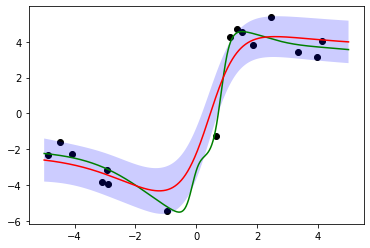

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys

def tanh(x):
    # (2.24)
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

fig = plt.figure()
dataAreaMax = 5.0
dataAreaMin = -5.0

trainDataNum = 16
trainSigmaW2 = 9.0
trainSigmaY2 = 1.0
trainHiddenLayerNum = 5

#These values should be inferred
#learningSigmaW2 = 9.0
#learningSigmaY2 = 0.09
learningHiddenLayerNum = 8
learningAlfa = 0.002

prevError = sys.float_info.max
maxError = 5.0

# Parameters for inference of parameters
# The average of gamma distribution is a/b
# The variance of gamma distribution is a/b^2

# The average of SigmaW2 is 9
# The variance of SigmaW2 is 9
learningAW2 = 9.0
learningBW2 = 1.0
# The average of SigmaY2 is 1
# The variance of SigmaY2 is 1
learningAY2 = 1.0
learningBY2 = 1.0

# Get initial parameters for SigmaW2 and SigmaY2
learningSigmaW2 = 1/np.random.gamma(learningAW2, 1 / learningBW2, 1)
learningSigmaY2 = 1/np.random.gamma(learningAY2, 1 / learningBY2, 1)

class NN:
    def __init__(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2

    def setX(self, x):
        # Input layer
        self.z0 = np.array([x, 1])
        # (2.22)
        self.a1 = self.z0.dot(self.wh1.T)
        
        # (2.21)
        hiddenTmp = tanh(self.a1)
        self.z1 = np.append(hiddenTmp, 1.0)
        
        # (2.20)
        self.a2 = self.wh2.dot(self.z1)
    
    def updateWeight(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2


    def getZ0data(self):
        return self.z0
    
    def getA1data(self):
        return self.a1
    
    def getZ1data(self):
        return self.z1
    
    def getA2data(self):
        return self.a2
    
    def getDA(self):
        # nabra_w a for (2.58)
        
        # da2/dw2 = z1 (2.33)((2.48))
        dA2 = self.z1
        # da2/dw1 = z0 (2.51), (2.52), (tanh)' = 1 / cosh^2 = 1 - tanh^2
        dA1 = np.outer(self.wh2[0:-1] * (1 - self.z1[0:-1]**2), self.z0)
        
        return np.concatenate([dA2, np.concatenate(dA1)])

# Create train data
# Select weights
trainWh1 = []
for i in range(trainHiddenLayerNum):
    trainWh1.append(np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = 2))
trainWh1 = np.array(trainWh1)
trainWh2 = np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = trainHiddenLayerNum + 1)
#print(trainWh1)

# Select x data
trainXs = np.random.rand(trainDataNum) * (dataAreaMax - dataAreaMin) + dataAreaMin
#print(trainXs)

# Create y data
trainNN = NN(trainWh1, trainWh2)
trainYs = []
for x in trainXs:
    trainNN.setX(x)
    trainYs.append(trainNN.getA2data() + np.random.normal(loc = 0.0, scale = np.sqrt(trainSigmaY2), size = 1)[0])

# Create a line
originalXs = np.linspace(dataAreaMin, dataAreaMax, 1000)
originalYs = []
for x in originalXs:
    trainNN.setX(x)    
    originalYs.append(trainNN.getA2data())
    
#Learing
#initialize data
learningWh1 = []

# Initialize weight
for i in range(learningHiddenLayerNum):
    learningWh1.append(np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = 2))
learningWh1 = np.array(learningWh1)
learningWh2 = np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = learningHiddenLayerNum + 1)

learningNN = NN(learningWh1, learningWh2)

# back propagation
while True:
    ew = 0.0
    dEw2 = np.zeros([1, learningHiddenLayerNum + 1])[0]
    dEw1 = np.zeros([learningHiddenLayerNum, 2])

    for x, y in zip(trainXs, trainYs):
        learningNN.setX(x)
        
        # (2.49)
        delta2 = learningNN.getA2data() - y
        # (2.54), (tanh)' = 1 / cosh^2 = 1 - tanh^2
        delta1 = delta2 * learningWh2[0:-1] * (1 - learningNN.getZ1data()[0:-1]**2)
        # (2.48)
        dEw2 += delta2 * learningNN.getZ1data()
        # (2.53)
        dEw1 += np.outer(delta1, learningNN.getZ0data())
        # (2.47)
        ew += 0.5 * delta2**2
        #print(" ", delta1)
        
#    print(ew)
#    print(dEw1)
#    print(dEw2)
#    print(learningWh1)
#    print(learningWh2)    
#    print(" ")
    
    if ew > prevError:
        break
    prevError = ew
#    if ew < maxError:
#        break
    
    
    # update weights
    # These equations are almost the same with those of NN with regularization
    # (5.6), (5.8)
    learningWh1 = (1 - learningAlfa / learningSigmaW2)*learningWh1 - learningAlfa / learningSigmaW2 * dEw1
    learningWh2 = (1 - learningAlfa / learningSigmaW2)*learningWh2 - learningAlfa / learningSigmaW2 * dEw2
    learningNN.updateWeight(learningWh1, learningWh2)
    
    # Now, W has been sampled.
    # The paramters will be updated.
    tmpW1 = np.ravel(learningWh1)
    # (5.24)
    learningAW2 += (len(tmpW1) + len(learningWh2)) / 2
    # (5.25)
    learningBW2 += (tmpW1.dot(tmpW1) + learningWh2.dot(learningWh2)) / 2
    # (5.28)
    learningAY2 += trainDataNum / 2.0
    # (5.29)
    learningBY2 += ew

    # Update SigmaW2 and SigmaY2
    # (5.23)
    learningSigmaW2 = 1/np.random.gamma(learningAW2, 1/learningBW2, 1)[0]
    # (5.27)
    learningSigmaY2 = 1/np.random.gamma(learningAY2, 1/learningBY2, 1)[0]

    print("E(W): ", ew, " : Aw : ", learningAW2, " : Bw : ", learningBW2, " : Sw2 : ", learningSigmaW2, " : Ay : ", learningAY2, " : By : ", learningBY2, " : Sy2 : ", learningSigmaY2)    
    
# For debug
#    break

# Calculate Hessian
# (5.10)
lambdaWMap = (1 / learningSigmaW2) * np.eye(learningHiddenLayerNum + 1 + learningHiddenLayerNum * 2)
# (2.58)
for x in trainXs:
    learningNN.setX(x)
    dA = learningNN.getDA()
    lambdaWMap += (1/learningSigmaY2) * np.outer(dA, dA)
    
# Create estimated data
upperPredictedYs = []
lowerPredictedYs = []
mapYs = []
lambdaInv = np.linalg.inv(lambdaWMap)

calValNN = NN(learningWh1, learningWh2)
for x in originalXs:
    calValNN.setX(x)
    # Calculate g
    # (5.13). f = a
    g = calValNN.getDA()
    
    # (5.15)
    sigmaX = np.sqrt(learningSigmaY2 + g.dot(lambdaInv.dot(g)))

    upperPredictedYs.append(calValNN.getA2data() + sigmaX)
    lowerPredictedYs.append(calValNN.getA2data() - sigmaX)
    mapYs.append(calValNN.getA2data())
    
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trainXs, trainYs, color = "black")
plt.plot(originalXs, originalYs, color = "green")
plt.plot(originalXs, mapYs, color = "red")
ax.fill_between(originalXs, upperPredictedYs, lowerPredictedYs, facecolor='blue', alpha=0.2)

plt.show()